# PRACTICAL ASSIGNMENT 1

# PART1

## PART 1:1

## STANDARD MULTIPLICATION

In [202]:
def multiply_bin_stand(numb1, numb2):
    number1 = numb1[::-1]
    number2 = numb2[::-1]
    store = []

    for ind, x in enumerate(number2):
        store.append([0] * ind)
        for y in number1:
            store[ind].append(int(x) * int(y))
        store[ind] = store[ind][::-1]
    result = []
    counter = 0
    max_length = len(store[-1])

    while counter < max_length:
        sum = 0
        for x in store:
            try:
                sum += x[-1 - counter]
            except IndexError:
                pass
        result.append(sum)
        counter += 1

    for ind, bit in enumerate(result):
        if bit != 0 and bit != 1:
            bin_bit = bin(bit)[2:][::-1]
            result[ind] = int(bin_bit[0])
            for i in range(1, len(bin_bit)):
                try:
                    result[ind + i] += int(bin_bit[i])
                except IndexError:
                    result.append(int(bin_bit[i]))
    res = ''.join(str(x) for x in result)
    return res[::-1]

In [203]:
print(multiply_bin_stand('1010010', '101010100101'))

110110100011011010


## STANDARD MULTIPLICATION COMPLEXITY
As for the O(n^2) term, this comes from having to multiply each bit of NUMBER1
with each bit of NUMBER2. Since there are now n bits in each number, this
takes n2 bit multiplications.

All other operations require n^2 or less operations.

## KARATSUBA MULTIPLICATION

In [204]:
def len_equality_change(str1, str2):
    len1 = len(str1)
    len2 = len(str2)
    if len1 < len2:
        for i in range(len2 - len1):
            str1 = '0' + str1
        return len2, str1, str2
    else:
        for i in range(len1 - len2):
            str2 = '0' + str2
    return len1, str1, str2


def bit_multiply(str1, str2):
    return int(str1[0]) * int(str2[0])


def store_bits(first, second):
    result = ""
    length, first, second = len_equality_change(first, second)
    helper = 0

    for i in range(length):
        first_bit = int(first[length - 1 - i])
        second_bit = int(second[length - 1 - i])
        sum = str((first_bit ^ second_bit ^ helper))
        result = str(sum + result)
        helper = (first_bit & second_bit) | (second_bit & helper) | (first_bit & helper)

    if helper:
        result = '1' + result
    return result

def karatsuba_multiplication(numb1, numb2):
    res = kar_multiply_bin(numb1, numb2)
    return bin(res)[2:]

def kar_multiply_bin(numb1, numb2):
    n_size, numb1, numb2 = len_equality_change(numb1, numb2)
    if n_size == 0:
        return 0
    if n_size == 1:
        return bit_multiply(numb1, numb2)
    first_half = n_size // 2
    second_half = n_size - first_half

    left_part1 = numb1[0: first_half]
    right_part1 = numb1[first_half:]

    left_part2 = numb2[0: first_half]
    right_part2 = numb2[first_half:]
    part1 = kar_multiply_bin(left_part1, left_part2)
    part2 = kar_multiply_bin(right_part1, right_part2)
    part3 = kar_multiply_bin(store_bits(left_part1, right_part1), store_bits(left_part2, right_part2))

    return part1 * (1 << (2 * second_half)) + (part3 - part1 - part2) * (1 << second_half) + part2


## COMPLEXITY OF KARATSUBA MULTIPLICATION
![](log3.jpeg)
![](log31.jpeg)

TEST KARATSUBA MULTIPLICATION

In [205]:
print(karatsuba_multiplication('1010010', '101010100101'))

110110100011011010


## BINARY MULTIPLICATION VISUALISATION

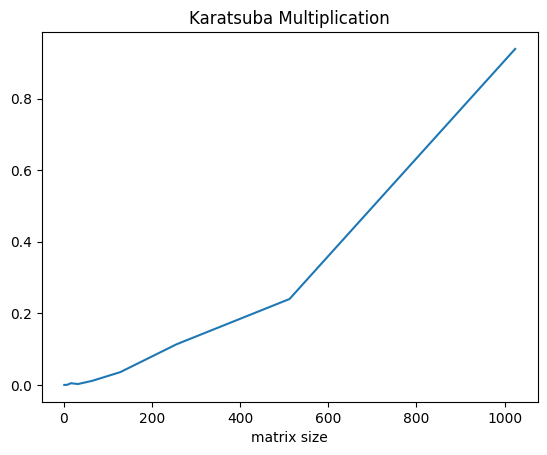

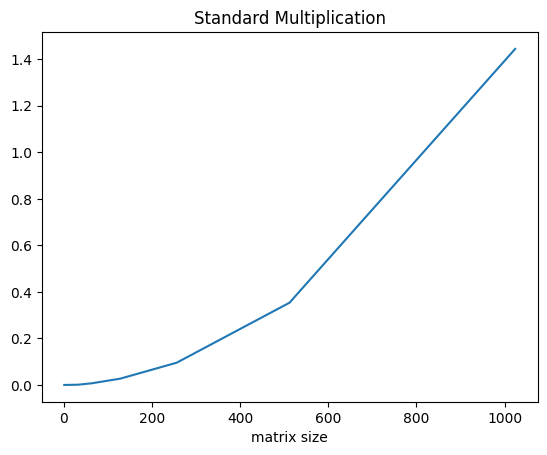

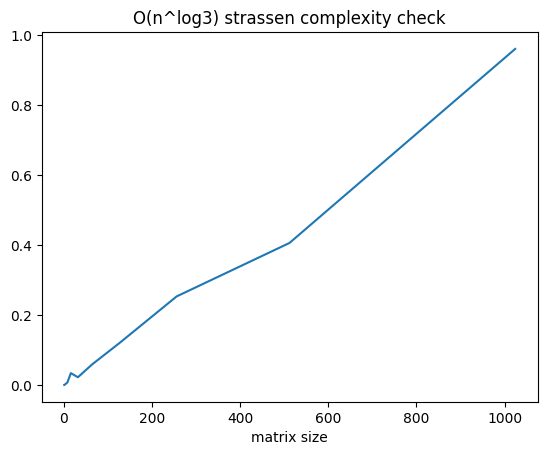

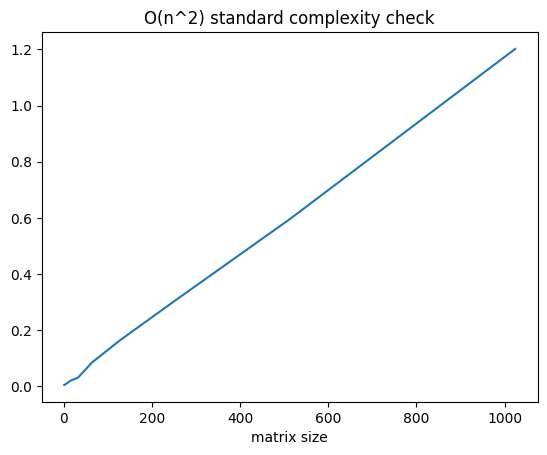

In [206]:
import time
import random
import math

import numpy as np
from matplotlib import pyplot as plt

bin_bit = [0, 1]
n_list = []

res_time1 = []
res_time2 = []

strassen_new_time = []
standard_new_time = []

for v in range(11):
    n_list.append(2 ** v)

for x in n_list:
    number1 = ""
    number2 = ""
    for bit in range(x):
        number1 += str(random.choice(bin_bit))
        number2 += str(random.choice(bin_bit))
    time1 = time.time()
    multiply_bin_stand(number1, number2)
    time2 = time.time()

    time3 = time.time()
    karatsuba_multiplication(number1, number2)
    time4 = time.time()

    res_time1.append(time2 - time1)
    res_time2.append(time4 - time3)

plt.plot(n_list, res_time2)
plt.title("Karatsuba Multiplication")
plt.xlabel("matrix size")
plt.show()

plt.plot(n_list, res_time1)
plt.title("Standard Multiplication")
plt.xlabel("matrix size")
plt.show()

for elem in res_time2:
    strassen_new_time.append(elem ** (1 / math.log(3, 2)))
plt.plot(n_list, strassen_new_time)
plt.title("O(n^log3) strassen complexity check")
plt.xlabel("matrix size")
plt.show()

for elem in res_time1:
    standard_new_time.append(elem ** (1 / 2))
plt.plot(n_list, standard_new_time)
plt.title("O(n^2) standard complexity check")
plt.xlabel("matrix size")
plt.show()

On the last two plot we can admit that they are simular to linear function, so complexity check done correct.

In [ ]:
bin_bit = [0, 1]
n_list = []

stand_big_time = []
stand_small_time = []
kar_big_time = []
kar_small_time = []


strassen_new_time = []
standard_new_time = []

for v in range(11):
    n_list.append(2 ** v)

for x in n_list:
    number1 = ""
    number2 = ""
    number3 = ""
    for bit in range(x):
        number1 += "1"
        number2 += str(random.choice(bin_bit))
        number2 += "0"
    time1 = time.time()
    multiply_bin_stand(number1, number2)
    time2 = time.time()

    time1_2 = time.time()
    multiply_bin_stand(number2, number3)
    time2_2 = time.time()

    time3 = time.time()
    karatsuba_multiplication(number1, number2)
    time4 = time.time()

    time3_2 = time.time()
    karatsuba_multiplication(number2, number3)
    time4_2 = time.time()

    stand_big_time.append(time2 - time1)
    stand_small_time.append(time2_2 - time1_2)
    kar_big_time.append(time4 - time3)
    kar_big_time.append(time4_2 - time3_2)


plt.plot(n_list, stand_big_time.append, label="bigger numbers")
plt.plot(n_list, stand_small_time, label="smaller numbers")
plt.legend()
plt.title("Standart multiplication")
plt.xlabel("array length")
plt.show()
plt.plot(n_list, kar_big_time, label="Find k-smallest element")
plt.plot(n_list, kar_small_time, label="Find k-smallest element")

## PART 2:2

## MATRICES STANDARD MULTIPLICATION

In [207]:
def multiply_matrix(matrix1, matrix2):
    if len(matrix1[0]) != len(matrix2):
        print("you can't multiply them, due to their size")
        return
    else:
        new_matrix = []
        for _ in range(len(matrix1)):
            new_matrix.append([0 for x in range(len(matrix2[0]))])
        for row_i, row in enumerate(matrix1):
            for col in range(len(matrix2[0])):
                sum = 0
                for ind in range(len(row)):
                    sum += row[ind] * matrix2[ind][col]
                new_matrix[row_i][col] = sum
    return new_matrix

In [208]:
res = multiply_matrix([[1, 2, 3], [5, 6, 9], [5, 6, 9]], [[2, 4, 5], [6, 8, 3], [4, 5, 1]])
for row in res:
    print(row)

[26, 35, 14]
[82, 113, 52]
[82, 113, 52]


## MATRICES STANDARD COMPLEXITY
To multiply two n x n matrices and produce a third n x n matrix, then
every element of the output matrix is the result of a dot product. Each dot
product takes O(n) time and you need to do n^2 of them.
So the entire matrix multiplication takes O(n3) time.

## MATRICES STRASSEN MULTIPLICATION

In [209]:
import numpy as np


def strassen_mult(matrix1, matrix2):
    if matrix1.size == 1 or matrix2.size == 1:
        return matrix1 * matrix2

    col_len = matrix1.shape[0]
    if col_len % 2 != 0:
        matrix1 = np.pad(matrix1, (0, 1), mode='constant')
        matrix2 = np.pad(matrix2, (0, 1), mode='constant')

    delimeter = int(np.ceil(col_len / 2))
    slice1 = matrix1[:delimeter, :delimeter]
    slice2 = matrix1[:delimeter, delimeter:]
    slice3 = matrix1[delimeter:, :delimeter]
    slice4 = matrix1[delimeter:, delimeter:]
    slice5 = matrix2[:delimeter, :delimeter]
    slice6 = matrix2[:delimeter, delimeter:]
    slice7 = matrix2[delimeter:, :delimeter]
    slice8 = matrix2[delimeter:, delimeter:]

    part1 = strassen_mult(slice1, slice6 - slice8)
    part2 = strassen_mult(slice1 + slice2, slice8)
    part3 = strassen_mult(slice3 + slice4, slice5)
    part4 = strassen_mult(slice4, slice7 - slice5)
    part5 = strassen_mult(slice1 + slice4, slice5 + slice8)
    part6 = strassen_mult(slice2 - slice4, slice7 + slice8)
    part7 = strassen_mult(slice1 - slice3, slice5 + slice6)

    res = np.zeros((2 * delimeter, 2 * delimeter), dtype=np.int32)
    # print(res)
    res[:delimeter, :delimeter] = part5 + part4 - part2 + part6
    res[:delimeter, delimeter:] = part1 + part2
    res[delimeter:, :delimeter] = part3 + part4
    res[delimeter:, delimeter:] = part1 + part5 - part3 - part7
    return res[:col_len, :col_len]

In [210]:
matrix1 = np.array([[1, 2, 3], [5, 6, 9], [5, 6, 9]])
matrix2 = np.array([[2, 4, 5], [6, 8, 3], [4, 5, 1]])
print(strassen_mult(matrix1, matrix2))

[[ 26  35  14]
 [ 82 113  52]
 [ 82 113  52]]


#### MATRICES STRASSEN MULTIPLICATION COMPLEXITY
![](log7.jpeg)
![](log71.jpeg)

## MATRICES MULTIPLICATION VISUALISATION

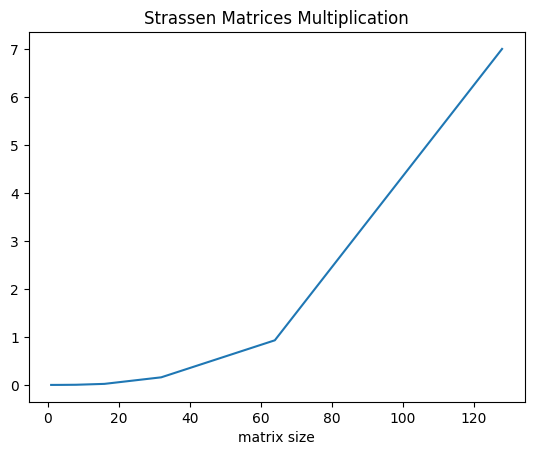

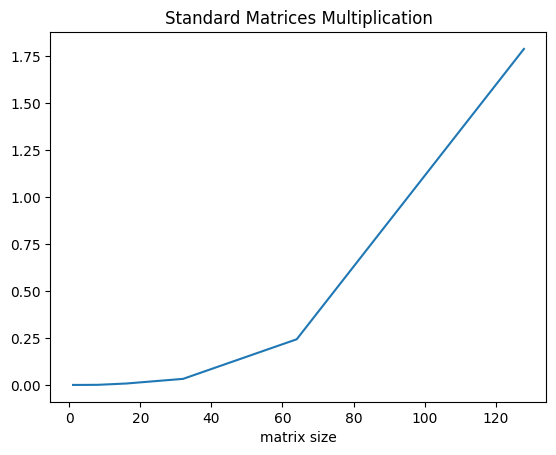

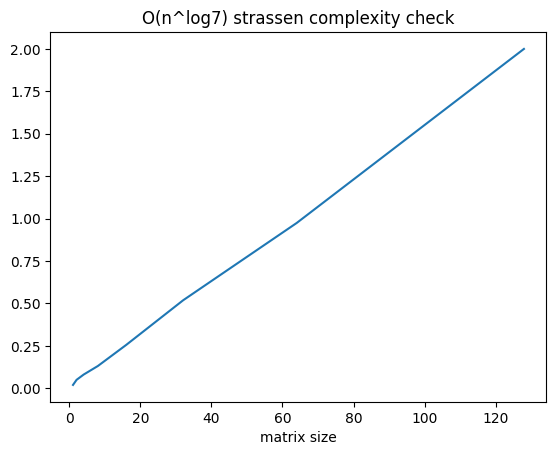

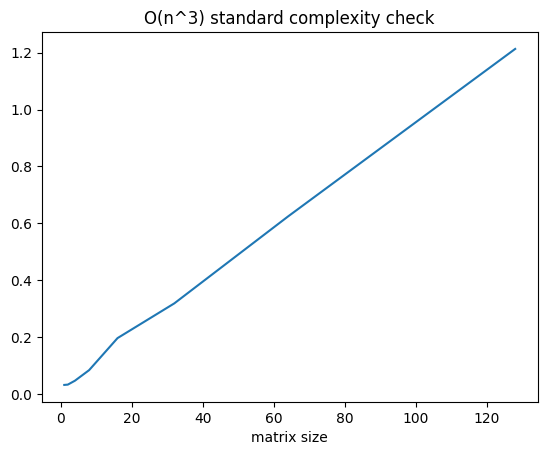

In [211]:
import time
import random
import math

import numpy as np
from matplotlib import pyplot as plt

n_list = []
strassen_new_time = []
standard_new_time = []
for v in range(8):
    n_list.append(2 ** v)
res_time1 = []
res_time2 = []
for n in n_list:
    matrix1 = np.zeros((n, n), dtype=int)
    matrix2 = np.zeros((n, n), dtype=int)
    for x in range(n):
        for y in range(n):
            matrix1[x][y] = random.randint(1, 50)
            matrix2[x][y] = random.randint(1, 50)
    time1 = time.time()
    strassen_mult(matrix1, matrix2)
    time2 = time.time()

    time3 = time.time()
    multiply_matrix(matrix1, matrix2)
    time4 = time.time()

    res_time1.append(time2 - time1)
    res_time2.append(time4 - time3)

plt.plot(n_list, res_time1)
plt.title("Strassen Matrices Multiplication")
plt.xlabel("matrix size")
plt.show()

plt.plot(n_list, res_time2)
plt.title("Standard Matrices Multiplication")
plt.xlabel("matrix size")
plt.show()

for elem in res_time1:
    strassen_new_time.append(elem ** (1 / math.log(7, 2)))
plt.plot(n_list, strassen_new_time)
plt.title("O(n^log7) strassen complexity check")
plt.xlabel("matrix size")
plt.show()

for elem in res_time2:
    standard_new_time.append(elem ** (1 / 3))
plt.plot(n_list, standard_new_time)
plt.title("O(n^3) standard complexity check")
plt.xlabel("matrix size")
plt.show()

On the last two plot we can admit that they are simular to linear function, so complexity check done correct.

In [ ]:
n_list = []
strassen_new_time = []
standard_new_time = []
for v in range(8):
    n_list.append(2 ** v)
res_time1 = []
res_time2 = []
for n in n_list:
    matrix1 = np.zeros((n, n), dtype=int)
    matrix2 = np.zeros((n, n), dtype=int)
    for x in range(n):
        for y in range(n):
            matrix1[x][y] = random.randint(1, 50)
            matrix2[x][y] = random.randint(1, 50)
    time1 = time.time()
    strassen_mult(matrix1, matrix2)
    time2 = time.time()

    time3 = time.time()
    multiply_matrix(matrix1, matrix2)
    time4 = time.time()

    res_time1.append(time2 - time1)
    res_time2.append(time4 - time3)

plt.plot(n_list, min_max_time, label="Find min/max")
plt.plot(n_list, median_time, label="Find median")
plt.plot(n_list, k_small_time, label="Find k-smallest element")
plt.legend()
plt.xlabel("array length")
plt.show()

# PART 2

## PART 2:1

## FIND MIN/MAX

In [212]:
def find_min(arr):
    min_el = arr[0]
    for el in arr:
        if el < min_el:
            min_el = el
    return min_el


def find_max(arr):
    max_el = arr[0]
    for el in arr:
        if el > max_el:
            max_el = el
    return max_el

In [213]:
print(find_min([3, 5, 2, 6, 1, 7]))
print(find_max([3, 5, 2, 6, 1, 7]))

1
7


## MEDIAN SEARCH
P.S. to run median search via randomized quicksort uncomment lines, and comment
#partitionIndex = partition(arr, left, right)

In [214]:
import random

a = -1
b = -1


def partition(arr, left, right):
    pivot = arr[right]
    ind = left
    j = left
    while j < right:
        if arr[j] < pivot:
            arr[ind], arr[j] = arr[j], arr[ind]
            ind += 1
        j += 1
    arr[ind], arr[right] = arr[right], arr[ind]
    return ind

def random_partition(arr, left, right):
    n = right - left + 1
    pivot = random.randrange(1, 100) % n
    arr[left + pivot], arr[right] = arr[right], arr[left + pivot]
    return partition(arr, left, right)

def median_check(arr, left, right, med_ind, a1, b1):
    global a, b

    if (left <= right):
        partitionIndex = partition(arr, left, right)
        # to run randomized quick sort uncomment this line and comment line above
        # partitionIndex = random_partition(arr, left, right)
        if (partitionIndex == med_ind):
            b = arr[partitionIndex]
            if (a1 != -1):
                return
        elif (partitionIndex == med_ind - 1):
            a = arr[partitionIndex]
            if (b1 != -1):
                return
        if (partitionIndex >= med_ind):
            return median_check(arr, left, partitionIndex - 1, med_ind, a, b)
        else:
            return median_check(arr, partitionIndex + 1, right, med_ind, a, b)
    return


def find_median(arr):
    global a
    global b

    n = len(arr)
    if n % 2 == 0:
        median_check(arr, 0, n - 1, n // 2, a, b)
        med = (a + b) // 2
    else:
        median_check(arr, 0, n - 1, n // 2, a, b)
        med = b
    return med


In [215]:
arr = [45, 2, 13, 6, 4, 8, 12]
print(find_median(arr))

8


## SEARCH K-SMALLEST ELEMENT IN ARRAY
P.S. to run median search via randomizes quicksort uncomment lines

In [216]:
import random

def random_partition(arr, left, right):
    n = right - left + 1
    pivot = random.randrange(1, 100) % n
    arr[left + pivot], arr[right] = arr[right], arr[left + pivot]
    return partition(arr, left, right)


def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1


def quick_sort(arr, left, right, ind):
    if left < right:
        # pivot = partition(arr, left, right)
        # to run randomized quick sort uncomment this line and comment line above
        # pivot = random_partition(arr, left, right)
        if pivot == ind:
            return arr[ind]
        quick_sort(arr, left, pivot - 1, ind)
        quick_sort(arr, pivot + 1, right, ind)
    return arr[ind]


def find_k_smallest(arr, ind):
    if ind >= len(arr):
        return
    return quick_sort(arr, 0, len(arr) - 1, ind)

In [217]:
arr = [13, 14, 9, 5, 8, 1, 7]
print(find_k_smallest(arr, 2))

7


## COMPLEXITY ANALIZ

#### Best case O(n):
Best case will be if your chosen pivot is a median

T(N) = 2T(n/2) +O(n)
T(n) = O(n)

#### Worst case O(n^2):
Worst case will be if every time your chosen pivot is the biggest or the
smallest element in array.

T(n) = T(n - 1) + O(n)
T(n) = O(n^2)

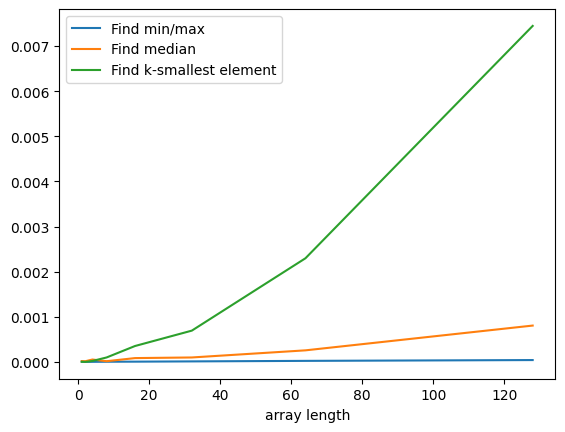

In [219]:
import random
import time

n_list = []
for v in range(8):
    n_list.append(2 ** v)
min_max_time = []
median_time = []
k_small_time = []
arr = []
for arr_len in n_list:
    for _ in range(arr_len):
        arr.append(random.randint(1, 100))

    time1 = time.time()
    find_min(arr)
    time2 = time.time()
    min_max_time.append(time2 - time1)

    time3 = time.time()
    find_median(arr)
    time4 = time.time()
    median_time.append(time4 - time3)

    time5 = time.time()
    find_k_smallest(arr, 5)
    time6 = time.time()
    k_small_time.append(time6 - time5)

plt.plot(n_list, min_max_time, label="Find min/max")
plt.plot(n_list, median_time, label="Find median")
plt.plot(n_list, k_small_time, label="Find k-smallest element")
plt.legend()
plt.xlabel("array length")
plt.show()

## PART 2:2

## Quicksort with (fixed pivot/uniformly random pivot)
P.S. just uncomment function you need and comment, which is useless

In [101]:
def partition(array, low, high):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if array[j] <= pivot:
            i = i + 1
            array[i], array[j] = array[j], array[i]
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1

# random pivot
def random_partition(arr, left, right):
    pivot = random.randint(left, right)
    arr[pivot], arr[right] = arr[right], arr[pivot]
    return partition(arr, left, right)

# fixed the smallest pivot
def smallest_partition(arr, left, right):
    arr[left], arr[right] = arr[right], arr[left]
    return partition(arr, left, right)


def quick_sort(arr, left, right):
    if left < right:
        # fixed pivot
        # pivot = smallest_partition(arr, left, right)
        # random pivot
        pivot = random_partition(arr, left, right)
        quick_sort(arr, left, pivot - 1)
        quick_sort(arr, pivot + 1, right)
    return arr

In [104]:
arr = [5, 6, 2, 7, 8, 1, 9, 3]
print(quick_sort(arr, 0, len(arr) - 1))

[1, 2, 3, 5, 6, 7, 8, 9]


Median quicksort

In [79]:
import random
import sys

print(sys.setrecursionlimit(5000))

a = -1
b = -1


def partition(arr, left, right):
    pivot = arr[right]
    ind = left
    j = left
    while j < right:
        if arr[j] < pivot:
            arr[ind], arr[j] = arr[j], arr[ind]
            ind += 1
        j += 1
    arr[ind], arr[right] = arr[right], arr[ind]
    return ind


def median_partition(arr, left, right):
    # n = right - left + 1
    # pivot = random.randrange(1, 100) % n
    pivot = find_median(arr)
    print(arr)
    print("pivot: ", pivot)
    arr[pivot], arr[right] = arr[right], arr[pivot]
    return partition(arr, left, right)


# def random_partition(arr, left, right):
#     n = right - left + 1
#     pivot = random.randrange(1, 100) % n
#     arr[left + pivot], arr[right] = arr[right], arr[left + pivot]
#     return partition(arr, left, right)

def quick_sort(arr, left, right):
    if left < right:
        pivot = median_partition(arr, left, right)
        quick_sort(arr, left, pivot - 1)
        quick_sort(arr, pivot + 1, right)
    return arr


def median_check(arr, left, right, med_ind, a1, b1):
    global a, b

    if (left <= right):
        # partitionIndex = partition(arr, left, right)
        partitionIndex = partition(arr, left, right)
        # partitionIndex = random_partition(arr, left, right)
        if (partitionIndex == med_ind):
            b = arr[partitionIndex]
            if (a1 != -1):
                return partitionIndex
        elif (partitionIndex == med_ind - 1):
            a = arr[partitionIndex]
            if (b1 != -1):
                return partitionIndex
        if (partitionIndex >= med_ind):
            return median_check(arr, left, partitionIndex - 1, med_ind, a, b)
        else:
            return median_check(arr, partitionIndex + 1, right, med_ind, a, b)
    return


def find_median(arr):
    global a
    global b

    n = len(arr)
    if n % 2 == 0:
        res = median_check(arr, 0, n - 1, n // 2, a, b)
        med = (a + b) // 2
    else:
        res = median_check(arr, 0, n - 1, n // 2, a, b)
        med = b
    return res


None


In [82]:
arr = [3, 8, 2, 5, 9, 6, 1, 4, 1]
print(quick_sort(arr, 0, len(arr) - 1))
# print(arr)

[1, 2, 1, 3, 9, 6, 8, 4, 5]
pivot:  3
[1, 2, 1, 3, 4, 5, 8, 9, 6]
pivot:  4
[1, 1, 2, 3, 4, 5, 6, 9, 8]
pivot:  4
[1, 1, 2, 3, 4, 5, 6, 8, 9]
pivot:  4
[1, 1, 2, 3, 4, 5, 6, 8, 9]
pivot:  4
[1, 1, 2, 3, 4, 5, 6, 8, 9]
pivot:  4
[1, 1, 2, 3, 4, 5, 6, 8, 9]
pivot:  4
[1, 1, 2, 3, 9, 5, 6, 4, 8]


## PART 2:3

## TRIVIAL COUNTING

In [116]:
def trivial_counting(arr):
    hash_map = {}
    for h in arr:
        if not hash_map.get(h):
            hash_map[h] = 1
    return len(hash_map.keys())

In [165]:
people = [3, 3, 4, 1, 2, 4, 2, 5, 6, 3, 2, 1, 6, 7, 2, 4, 1]
print(trivial_counting(people))

7


## FLAJOLET-MARTIN

In [166]:
def flajolet_martin(data):
    zero_list = []
    for item in data:
        hash_value = (3 * item + 1) % 5
        zero_count = bin(hash_value)[2:].count("0")
        zero_list.append(zero_count)
    res = (2 ** max(zero_list)) / 0.77351
    return res

In [167]:
print(flajolet_martin([3, 3, 4, 1, 2, 4, 2, 5, 6, 3, 2, 1, 6, 7, 2, 4, 1]))

5.171232433969825


## LOGLOG

In [196]:
def log_log(data):
    zero_list = []
    for item in data:
        hash_value = (3 * item + 1) % 5
        zero_count = bin(item)[2:4].count("0")
        zero_list.append(zero_count)
    print(zero_list)
    power = (sum(zero_list) / len(zero_list))
    res = (len(zero_list) * (2 ** power)) / 0.77351
    return res

In [197]:
print(log_log([3, 3, 4, 1, 2, 4, 2, 5, 6, 3, 2, 1, 6, 7, 2, 4, 1]))

[0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0]
30.453987359790847


## SUPERLOGLOG

In [194]:
def super_log_log(data):
    zero_list = []
    for item in data:
        hash_value = (3 * item + 1) % 5
        zero_count = bin(item)[2:4].count("0")
        zero_list.append(zero_count)
    ind = int(len(zero_list) * 0.7)
    new_list = sorted(zero_list)[:ind]
    res = (len(zero_list) * (2 ** (sum(new_list)/ind))) / 0.77351
    return res

In [195]:
print(super_log_log([3, 3, 4, 1, 2, 4, 2, 5, 6, 3, 2, 1, 6, 7, 2, 4, 1]))

24.9296232464


## HYPERLOGLOG

In [192]:
from statistics import harmonic_mean

def hyper_log_log(data):
    zero_list = []
    for item in data:
        hash_value = (3 * item + 1) % 5
        zero_count = bin(item)[2:4].count("0")
        zero_list.append(zero_count)
    two_list = []
    for power in zero_list:
        two_list.append(2**power)
    res = (len(zero_list) * harmonic_mean(two_list)) / 0.77351
    return res


In [193]:
print(hyper_log_log([3, 3, 4, 1, 2, 4, 2, 5, 6, 3, 2, 1, 6, 7, 2, 4, 1]))

28.740118719563068
